In [65]:
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd

from matplotlib import rc,cm
from matplotlib.colors import Normalize
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
rc('font',**{'family':'serif','serif':['Palatino']})
rc('font',**{'size':11})
rc('text', usetex=True)

# New
shotno = 1160930034 
far3d_eigevectors = ['br_7029','br_1087','br_1133','br_1221']
n = [7,10,11,12]

# # Old:
# shotno = 1051202011
# far3d_eigevectors = ['br_0601','br_0703','br_0811','br_0908','br_1073',
#                      'br_1103','br_1206']
# n = [6,7,8,9,10,11,12]

baseFile = 'M3D-C1_Data/'

eigenvecs = []
for i in range(len(far3d_eigevectors)):
    dat_r = np.loadtxt(baseFile + far3d_eigevectors[i], skiprows=1)
    psi_tor = dat_r[:,0]
    dat_r = dat_r[:,1:]

    eigenvecs.append({'psi_tor': psi_tor, 'data': dat_r, 'n': n[i]})

print(dat_r.shape)

(1001, 14)


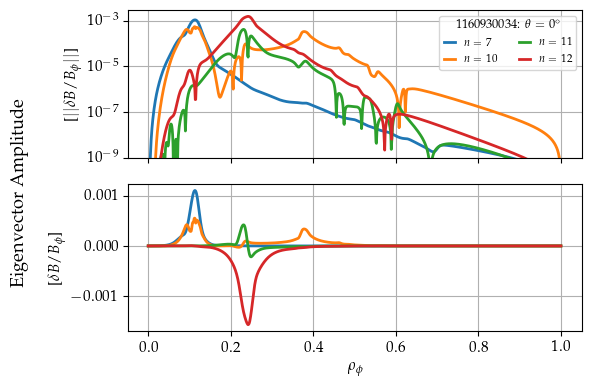

In [66]:


plt.close('Eigenvecs')
fig,ax = plt.subplots(2,1, figsize=(6,4),tight_layout=True,num='Eigenvecs',sharex=True)

for eig in eigenvecs:
    psi_tor = eig['psi_tor']
    data =(np.sum(eig['data'][:,:7],axis=1))
    n = eig['n']

    ax[0].semilogy(psi_tor,  np.abs(data), label=f'$n={n}$')
    ax[1].plot(psi_tor, data)

ax[1].set_xlabel(r'$\rho_{\phi}$')
ax[1].set_ylabel(r'[$\delta B/B_\phi$]')
ax[0].set_ylabel(r'[$||\delta B/B_\phi||$]')

# big_ax = fig.add_subplot(111, frameon=False)
# big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# big_ax.set_ylabel(r'Eigenvector Amplitude [$||\delta B/B_\phi||$]')
fig.supylabel(r'Eigenvector Amplitude')
# ax[0].set_ylabel(r'Eigenvector Amplitude [$||\delta B/B_\phi||$]')

for i in range(2): ax[i].grid()
ax[0].set_ylim([1e-9,3e-3])

ax[0].legend(frameon=True, loc='upper right',fontsize=8,title=rf'{shotno}: $\theta=0^\circ$',title_fontsize=9,\
             handlelength=1,ncol=2)

fig.savefig(getcwd() + '/output_plots/FAR3d_Eigenvectors_real_new.pdf', transparent=True)